In [11]:
!pip install numpy scipy scikit-learn

     --------------------------------------- 34.1/34.1 MB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 7.1/7.1 MB 7.6 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 6.3 MB/s eta 0:00:00


In [1]:
import pandas as pd 
import numpy as np


In [2]:
df = pd.read_csv(r"C:\Users\ravid\OneDrive\KN\Airfoil\airfoil_self_noise.dat",sep ="\t", header=None)

In [3]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [4]:
df.columns=["Frequency", "AoA", "Chord_lenght","Stream_vel", "Suction_side","Pressure_level"]

In [5]:
df.head()

,Frequency,AoA,Chord_lenght,Stream_vel,Suction_side,Pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
X  = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

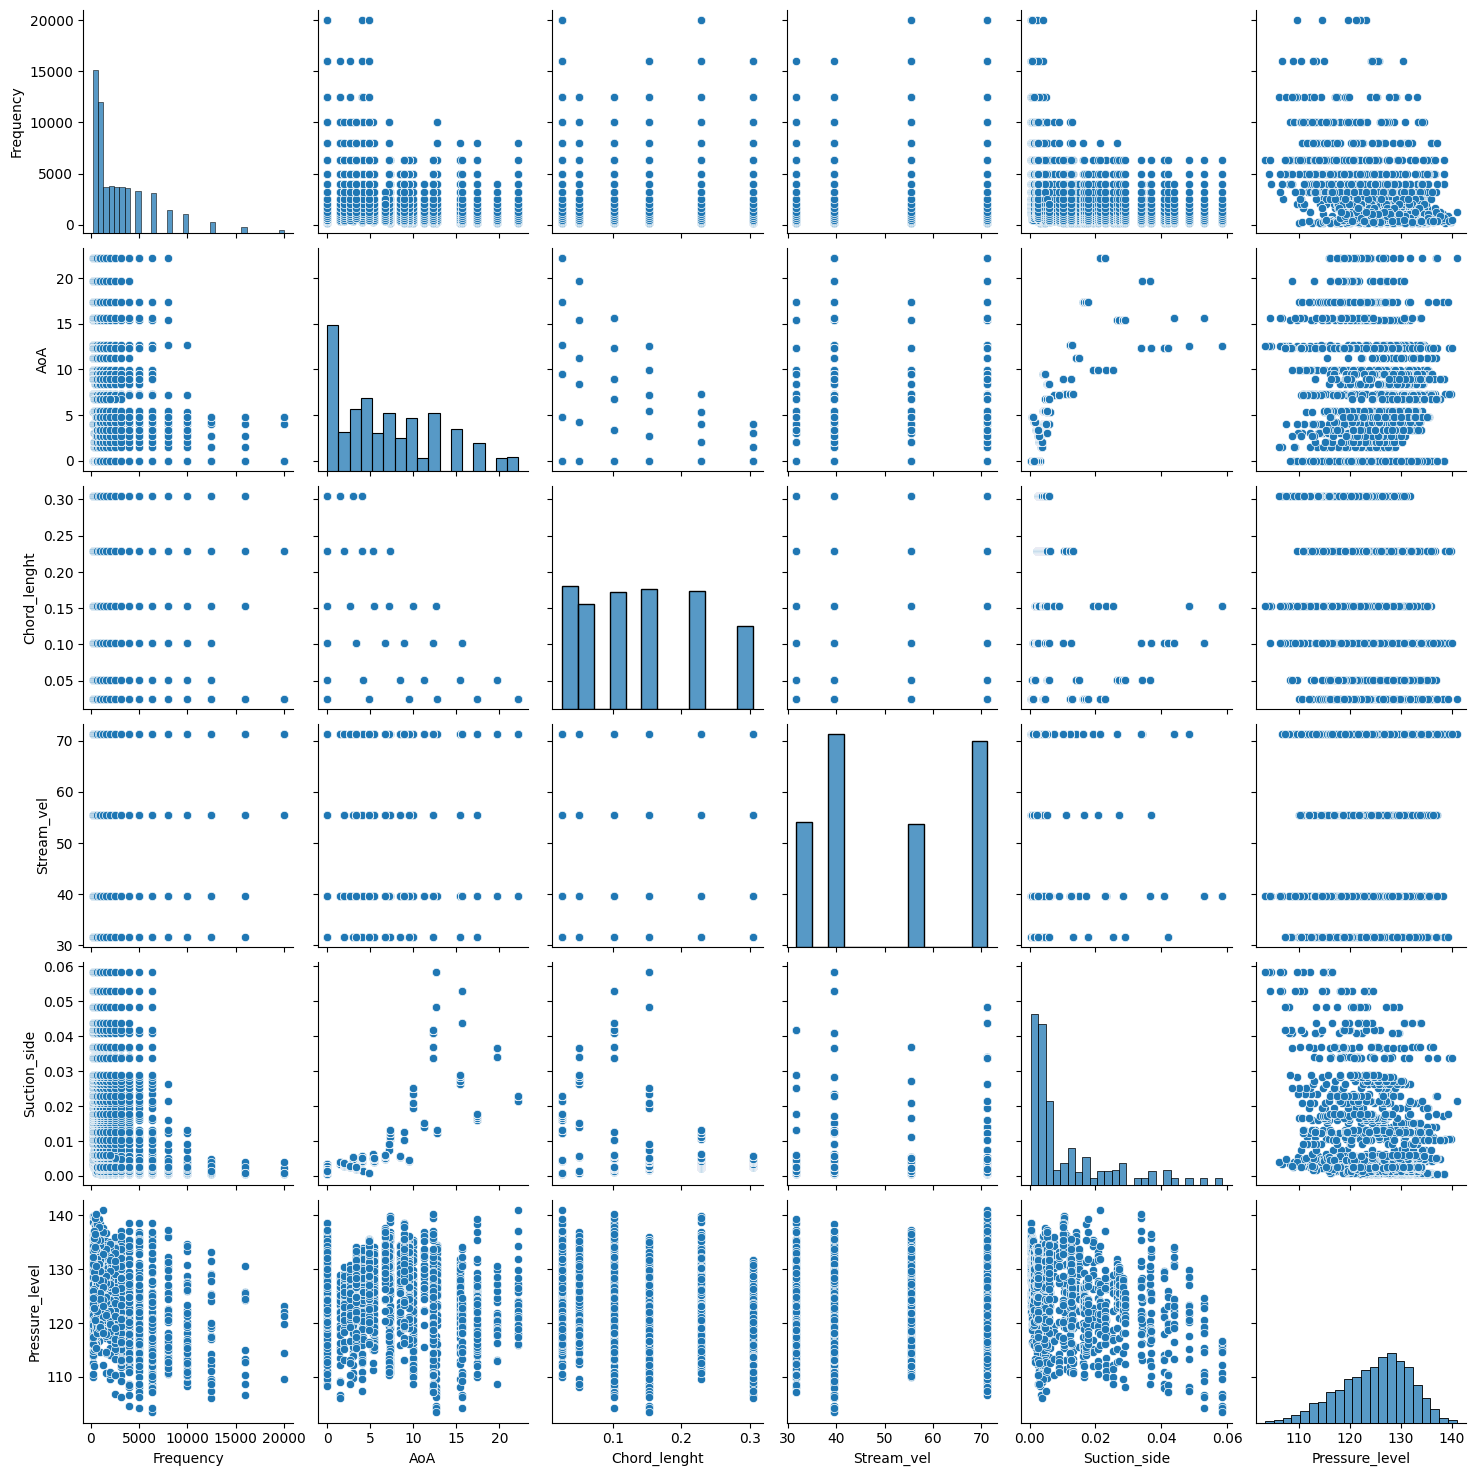

In [8]:
import seaborn as sns
sns.pairplot(df)

### Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = regressor.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
r2_score(y_test, y_pred)

0.4982726587932875

### Ridge

In [14]:
from sklearn.linear_model import Ridge

In [15]:
Ridge = Ridge(alpha=0.1)
Ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [16]:
y_pred_ridge = Ridge.predict(X_test)

In [17]:
r2_score(y_test, y_pred_ridge)

0.4932830195650162

### Lasso

In [18]:
from sklearn.linear_model import Lasso

In [19]:
Lasso = Lasso(alpha=0.1)
Lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [20]:
y_pred_lasso = Lasso.predict(X_test)

In [21]:
r2_score(y_test, y_pred_lasso)

0.4282107364109746

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
regr = RandomForestRegressor(max_depth=20, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, random_state=0)

In [24]:
y_pred_Random = regr.predict(X_test)

In [25]:
r2_score(y_test, y_pred_Random)

0.925967243849969

In [26]:
import pickle
pickle.dump(regr,open('model.pkl','wb'))

In [27]:
pickle_model = pickle.load(open('model.pkl', 'rb'))
y_pred_Random = pickle_model.predict(X_test)

In [28]:
r2_score(y_test, y_pred_Random)

0.925967243849969

In [30]:
dict_test = {
"Frequency":400,
"AoA":0.0,
"Chord_lenght":0.3048,
"Stream_vel":31.7,
"Suction_side":0.003313
}

In [31]:
pickle_model = pickle.load(open('model.pkl', 'rb'))
pickle_model.predict([list(dict_test.values())])[0]

C:\Users\ravid\Anaconda3\envs\Myenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


124.05880000000003

In [48]:
pickle_model.predict([list(dict_test.values())])

C:\Users\ravid\Anaconda3\envs\Myenv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([117.09571])

In [55]:
X_test
y_test

51      125.045
1465    118.767
184     120.233
1000    137.047
746     134.556
         ...   
522     120.534
140     114.042
1085    123.894
1422    118.018
654     119.875
Name: Pressure_level, Length: 451, dtype: float64